# Energie mécanique d’un système

## Mesures
- Ouvrir le fichier `pendule.ino` dans le logiciel Arduino.
- Sélectionner le port COM et téléverser le programme dans la carte.
- Exécuter le programme python  `mesures_pendule.py`.
- Lancer le pendule, taper `mesures` dans la boite de dialogue (puis entrée).
- Si les mesures vous conviennent, fermer la fenêtre graphique et taper `sauve` dans la boite de dialogue. Un fichier `mesures_pendule.csv` est enregistré. Il contient le tableau des valeurs de `t`, `x` et `y`.
- Copiez le fichier `mesures_pendule.csv` sur le serveur dans le même dossier que ce notebook.

## Exploitation

<div class="alert alert-block alert-info">
    
Exécutez la celllule ci-dessous. Si vous n'obtenez pas d'erreur, c'est que la strructure de votre fichier `pendule` est correcte.
</div>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from scipy import optimize

# lecture du fichier csv
t, x, y = [], [], []
with open('mesures_pendule.csv','r') as f :
# with open('mesures_pendule_frott.csv','r') as f :
    for ligne in f:
        result = ligne.replace('\n', '').split(';')
        t.append(float(result[0]))
        x.append(float(result[1]))
        y.append(float(result[2]))
    f.close()

<div class="alert alert-block alert-info">
    
Renseignez la masse du pendule
</div>

In [15]:
# masse du pendule
m = 186.64e-3
g = 9.81

<div class="alert alert-block alert-info">
    
Calculez les valeurs de l'énergie potentielle de pesanteur `Epp` pour chaque pointage
</div>

In [16]:
# calcul des énergies potentielles de pesanteur Epp
Epp = []

for i in range(1,len(t)-1):
    Epp_i = m*g*y[i]
    Epp.append(Epp_i)

# affichage des 5 premières valeurs de Epp
print(Epp[:5])

[0.27458082285075686, 0.24659163137846987, 0.2119876555121125, 0.17368864888790395, 0.13693624967528206]


<div class="alert alert-block alert-info">
    
- Calculez les coordonnées `vx` et `vy` du vecteur vitesse pour chaque position du pendule
- En déduire la valeur de la vitesse `v` aux différentes dates
- Calculez les valeurs de l'énergie cinétique `Eci` pour chaque pointage.  
</div>

In [17]:
# calcul des coordonnées du vecteur vitesse pour chaque position du pendule (chaque date)
Ec = []
for i in range(1,len(t)-1):
    vx = (x[i+1]-x[i-1])/(t[i+1]-t[i-1])
    vy = (y[i+1]-y[i-1])/(t[i+1]-t[i-1])
    v = sqrt(vx**2+vy**2)
    Ec_i = 1/2*m*v**2
    Ec.append(Ec_i)
    
# affichage des 5 premières valeurs de Ec
print(Ec[:5])

[0.042251515794024516, 0.07238686664510782, 0.10702349583809014, 0.14393566375735306, 0.1828510269616866]


<div class="alert alert-block alert-info">
    
Déterminez à chaque instant la valeur de l’énergie mécanique `E` du pendule
</div>

In [18]:
# calcul des énergies mécaniques E
t1 = t[1:-1] # nouveau temps
E = []
for i in range(len(t1)):
    E_i = Ec[i] + Epp[i]
    E.append(E_i)

# affichage des 5 premières valeurs de E
print(E[:5])

[0.3168323386447814, 0.3189784980235777, 0.31901115135020264, 0.31762431264525703, 0.31978727663696865]


<div class="alert alert-block alert-info">
    
Affichez le graphique
</div>

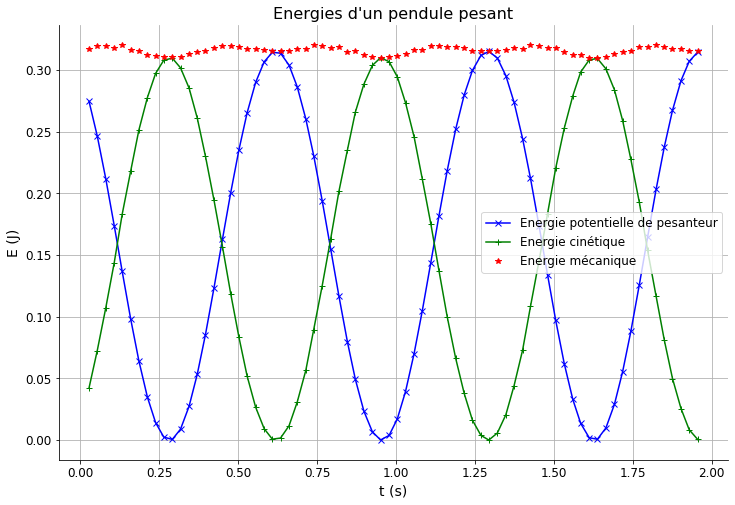

In [19]:
# affichage du graphique
fig, av = plt.subplots(figsize=(12,8))
ap=plt.gca()
ap.spines['right'].set_color('none')
ap.spines['top'].set_color('none')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title("Energies d'un pendule pesant",fontsize = 16)
plt.xlabel('t (s)',fontsize=14)
plt.plot(t1,Epp,'-x',color="blue",label='Energie potentielle de pesanteur')
plt.ylabel('E (J)',fontsize=14)
plt.plot(t1,Ec,'-+',color="green",label='Energie cinétique')
plt.plot(t1,E,'*',color="red",label='Energie mécanique')
plt.grid()
plt.legend(fontsize=12)
plt.show()

## Questions 

<div class="alert alert-block alert-info">
    
Relevez la valeur maximale de l'énergie potentielle de pesanteur. À quelle position du pendule correspond-elle? 
</div>

Votre réponse ici

<div class="alert alert-block alert-info">

Comment évolue l'énergie potentielle de pesanteur du solide au cours d'une période d'oscillation?    
</div>    

Votre réponse ici

<div class="alert alert-block alert-info">

Relevez la valeur maximale de l'énergie cinétique. À quelle position du pendule correspond-elle?
</div>

Votre réponse ici

<div class="alert alert-block alert-info">
    
Comment évolue l'énergie cinétique au cours d'une période d'oscillation?
</div>

Votre réponse ici

<div class="alert alert-block alert-info">

Indiquez comment évolue l'énergie mécanique du pendule. Conclure.
</div>

Votre réponse ici